## 08-01 순환 신경망(Recurrent Neural Network, RNN)

RNN(Recurrent Neural Network)은 입력과 출력을 시퀀스 단위로 처리하는 시퀀스(Sequence) 모델입니다. 

### 순환 신경망(Recurrent Neural Network, RNN)

피드 포워드 신경망(Feed Forward Neural Network): 은닉층에서 활성화 함수를 지난 값은 오직 출력층 방향으로만 향하는 신경망  
RNN(Recurrent Neural Network): 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖는 신경망

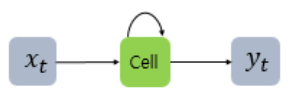  
셀(cell): RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드로 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 메모리 셀 또는 RNN 셀이라고 표현

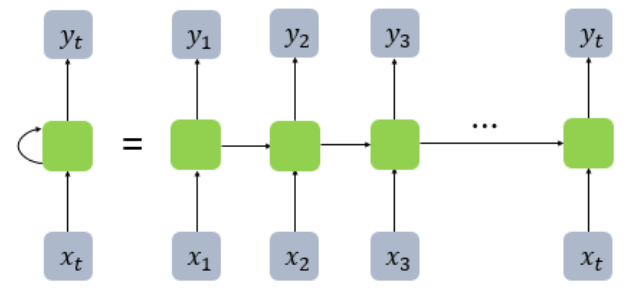   
은닉 상태(hidden state): 메모리 셀이 출력층 방향 또는 다음 시점인 t+1의 자신에게 보내는 값  
다시 말해 t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용

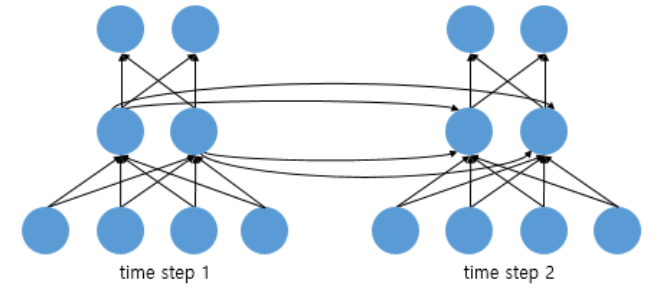  
ex. 입력 벡터의 차원이 4, 은닉 상태의 크기가 2, 출력층의 출력 벡터의 차원이 2인 RNN이 시점이 2일 때의 모습

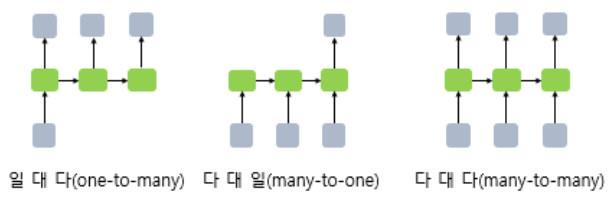  
RNN은 입력과 출력의 길이를 다르게 설계 할 수 있으므로 다양한 용도로 사용

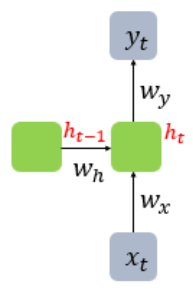  
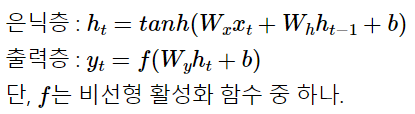  
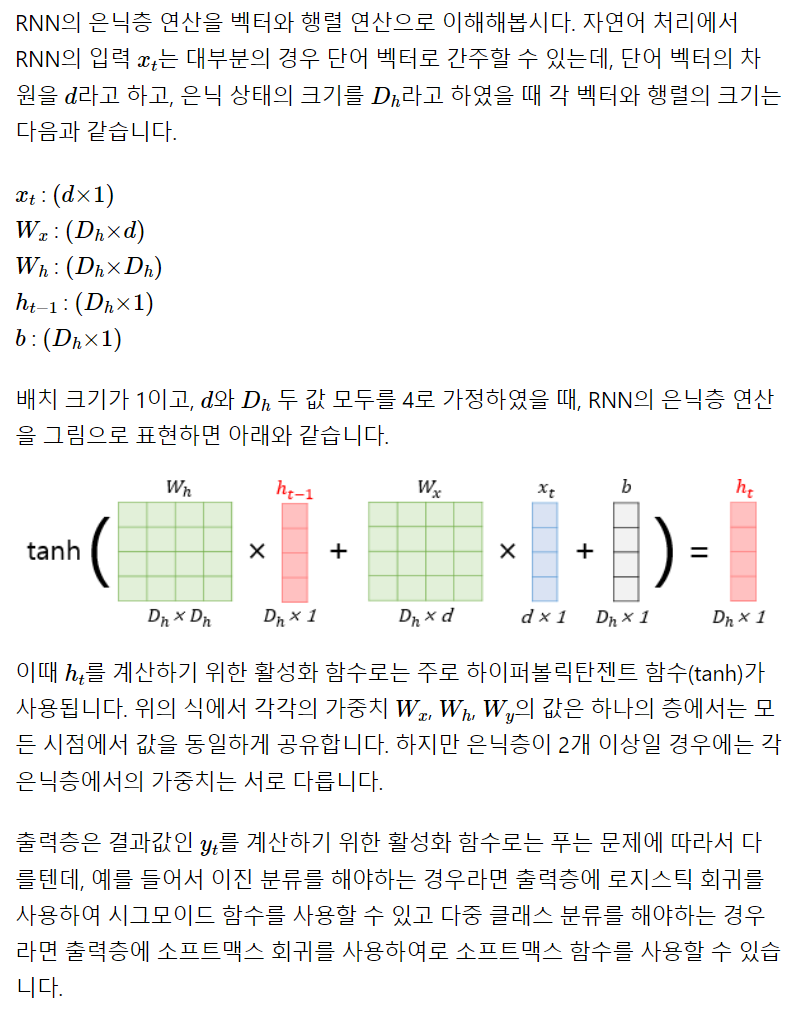

### 케라스(Keras)로 RNN 구현하기

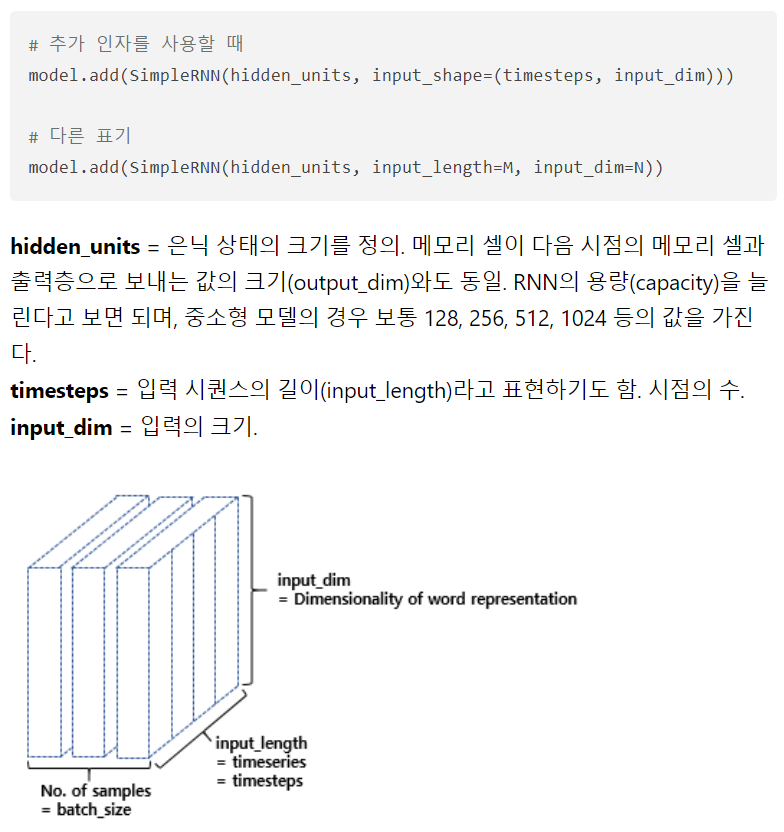  
RNN 층은 (batch_size, timesteps, input_dim) 크기의 3D 텐서를 입력으로 받습니다. batch_size는 한 번에 학습하는 데이터의 개수를 말합니다. 

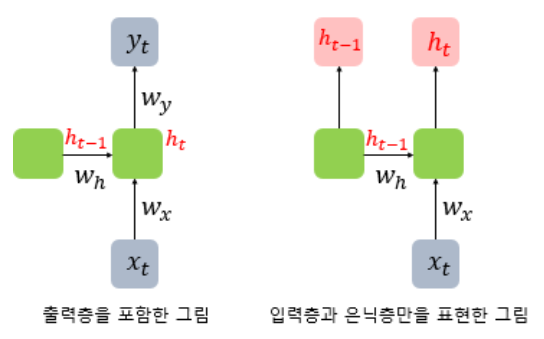   
메모리 셀의 최종 시점의 은닉 상태만을 리턴하고자 한다면 (batch_size, output_dim) 크기의 2D 텐서를 리턴합니다. 하지만, 메모리 셀의 각 시점(time step)의 은닉 상태값들을 모아서 전체 시퀀스를 리턴하고자 한다면 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴합니다. 


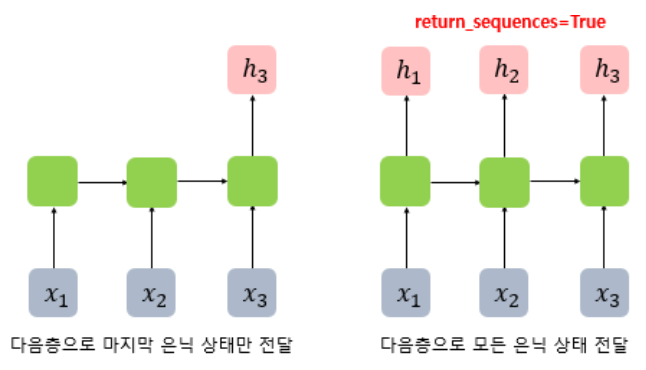  
return_sequences=True: 메모리 셀이 모든 시점(time step)에 대해서 은닉 상태값을 출력. 다 대 다(many-to-many) 문제를 풀 수 있음.  
return_sequences=False: 메모리 셀은 최종 시점의 은닉 상태값만을 출력. 다 대 일(many-to-one) 문제를 풀 수 있음.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [2]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10))) # batch_size: 8
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### 파이썬으로 RNN 구현하기

In [4]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [6]:
total_hidden_states = []

# 각 시점 별 입력값.
for input_t in inputs:

  # Wx * Xt + Wh * Ht-1 + b(bias)
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b)

  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
  # 각 시점의 은닉 상태의 값을 계속해서 누적
  total_hidden_states.append(list(output_t))
  hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states = np.stack(total_hidden_states, axis = 0) 

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')
print(total_hidden_states)

모든 시점의 은닉 상태 :
[[0.84570699 0.88299225 0.7425184  0.81612737 0.80185616 0.66602877
  0.83576595 0.8735612 ]
 [0.99897241 0.99956004 0.99922113 0.9999531  0.9996708  0.99996906
  0.99982859 0.99976146]
 [0.99988985 0.99997187 0.99992095 0.99999827 0.99997797 0.99999877
  0.99998846 0.99997472]
 [0.99975364 0.99976785 0.99975757 0.99999005 0.99996006 0.99999213
  0.99996965 0.9998905 ]
 [0.99982059 0.99993387 0.99983538 0.99999561 0.99994795 0.99999581
  0.99998357 0.99995498]
 [0.99916616 0.99944114 0.99957594 0.99998234 0.99991921 0.99999076
  0.99991406 0.99988592]
 [0.9997979  0.99984089 0.99964996 0.99998785 0.99993846 0.99999173
  0.99994213 0.99992416]
 [0.99951034 0.99984148 0.99977209 0.99999346 0.99994515 0.99999702
  0.99994362 0.99995301]
 [0.99980397 0.9998654  0.99971574 0.99999043 0.9999363  0.99999135
  0.99996835 0.99992462]
 [0.99985063 0.99994128 0.99988571 0.99999694 0.99997785 0.99999831
  0.99997695 0.9999624 ]]


### 깊은 순환 신경망(Deep Recurrent Neural Network)

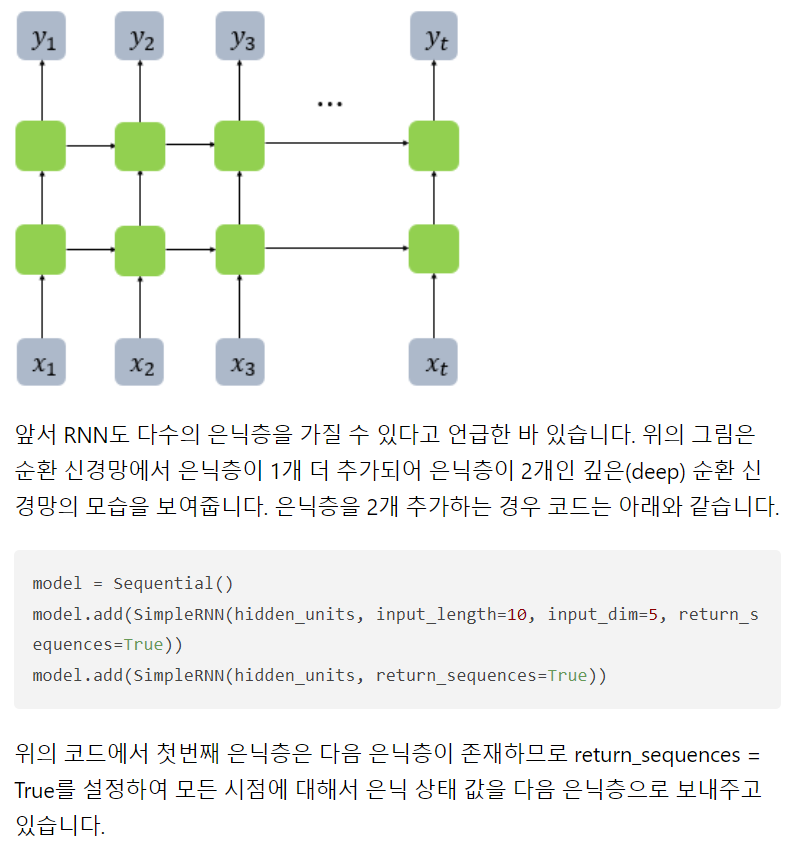

### 양방향 순환 신경망(Bidirectional Recurrent Neural Network)

양방향 순환 신경망은 시점 t에서의 출력값을 예측할 때 이전 시점의 입력뿐만 아니라, 이후 시점의 입력 또한 예측에 기여할 수 있다는 아이디어에 기반합니다. RNN이 풀고자 하는 문제 중에서는 과거 시점의 입력 뿐만 아니라 미래 시점의 입력에 힌트가 있는 경우도 많습니다. 그래서 이전과 이후의 시점 모두를 고려해서 현재 시점의 예측을 더욱 정확하게 할 수 있도록 고안된 것이 양방향 RNN입니다.

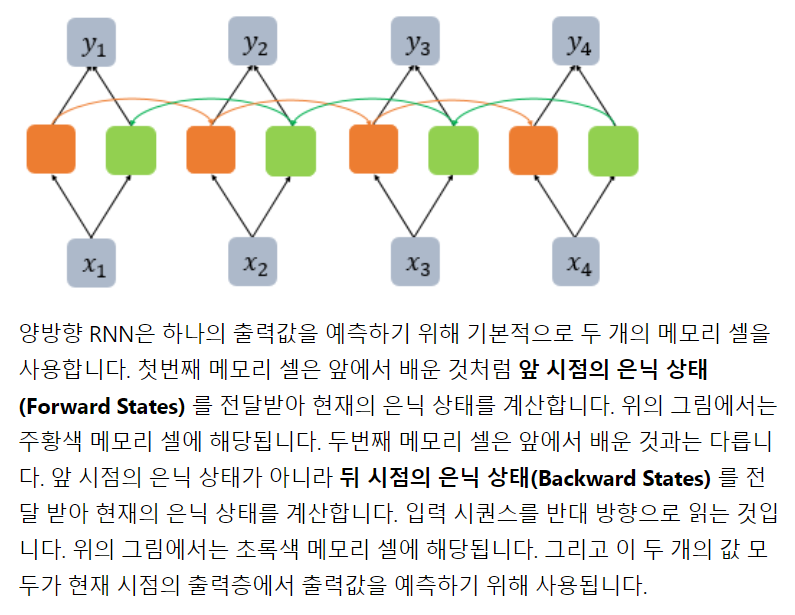

In [7]:
from tensorflow.keras.layers import Bidirectional

timesteps = 10
input_dim = 5

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))

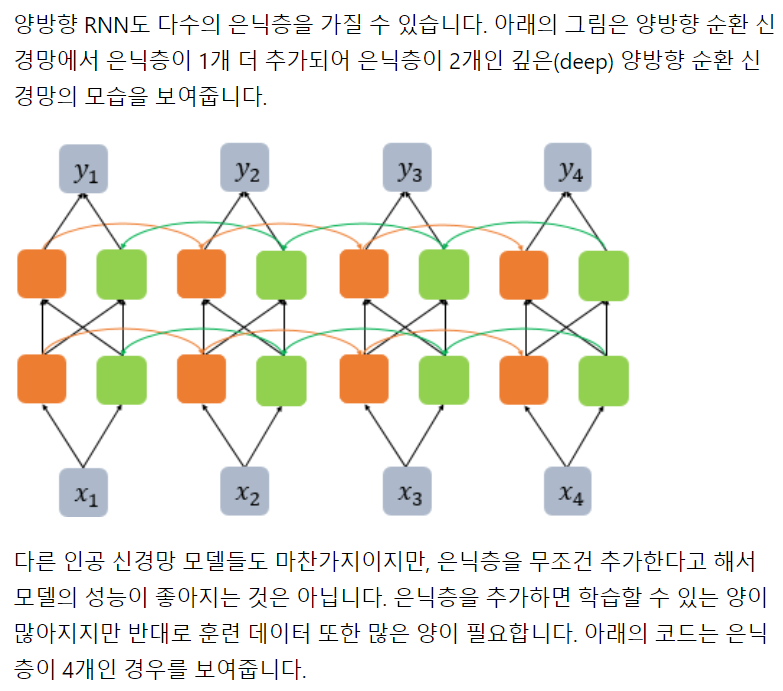

In [8]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))

### 점검 퀴즈

RNN을 제대로 이해했는지 퀴즈를 통해서 확인해보세요! 모델에 대한 설명이 다음과 같을 때, 총 파라미터 개수를 구해보세요.

- Embedding을 사용하며, 단어 집합(Vocabulary)의 크기가 5,000이고 임베딩 벡터의 차원은 100입니다.
- 은닉층에서는 Simple RNN을 사용하며, 은닉 상태의 크기는 128입니다.
- 훈련에 사용하는 모든 샘플의 길이는 30으로 가정합니다.
- 이진 분류를 수행하는 모델로, 출력층의 뉴런은 1개로 시그모이드 함수를 사용합니다.
- 은닉층은 1개입니다.

In [9]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense

vocab_size = 5000
embedding_dim = 100
hidden_size = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_size))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 128)               29312     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 529,441
Trainable params: 529,441
Non-trainable params: 0
_________________________________________________________________
